<a href="https://colab.research.google.com/github/Arajit-Pati/Projects/blob/main/Train_reliability_prediction/Railway_data_cleanup_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cleaning of railway schedules and delay data | Exploratory data analysis**
 II||-_-|
---
- We will deal with two csv files and hence, data frames here

## Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## File 1
---

In [3]:
schedule = pd.read_csv('train_schedule_SC.csv')

In [4]:
schedule.head()

,Unnamed: 0,Train number,Train name (no.) passing via Secunderabad Junction,Arrives,Departs,Stop time,M,T,W,T.1,F,S,S.1
0,0,12733,Narayanadri Express (12733),06:25,Ends,NaN,Y,Y,Y,Y,Y,Y,Y
1,1,12747,Palnadu Express (12747),10:35,10:45,10 min,Y,Y,Y,Y,Y,Y,Y
2,2,12759,Charminar Express (12759),07:15,07:20,5 min,Y,Y,Y,Y,Y,Y,Y
3,3,57140,Link Secbad Express (57140),04:45,Ends,NaN,Y,Y,Y,Y,Y,Y,Y
4,4,8566,Nzb Vskp Special (08566),21:10,21:30,20 min,N,N,Y,N,N,N,N


## Data cleanup

In [5]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           245 non-null    int64 
 1   Train number                                         245 non-null    int64 
 2   Train name (no.) passing via  Secunderabad Junction  245 non-null    object
 3   Arrives                                              245 non-null    object
 4   Departs                                              245 non-null    object
 5   Stop time                                            106 non-null    object
 6   M                                                    245 non-null    object
 7   T                                                    245 non-null    object
 8   W                                                    245 non-null    object
 9  

### Insights:-
1) There is a rudimentary column for index
2) Train number is supposed to be a string
3) Weekdays are explainable more neatly
4) Time stamps can be converted to time objects (suitable for processing)

Explaining Thursday from tuesday and Sunday from Saturday

In [6]:
schedule.rename(columns = {'T.1' : 'Th', 'S.1' : 'Su'}, inplace = True)

removing unwanted cols

In [7]:
del schedule['Unnamed: 0']

Generally, it is seen that trains halting at a station spend about 1 hr before dismissing else where.\
It is also seen that trains starting off must be staged on the platform about 1 hr prior.

In [8]:
# assume that those trains which either start or halt here must be posing for 60 mins
schedule['Stop time'].fillna('59 min', inplace = True)

In [9]:
schedule.replace('Y', 1, inplace = True) # 1 represents yes
schedule.replace('N', 0, inplace = True) # 0 represents no
# Will be useful for processing later

Converting train numbers into string. Also, train no. as a string must have five digits, including trailing zeros.

In [10]:
schedule['Train number'] = schedule['Train number'].apply(lambda x : str(x))
mask = schedule['Train number'].apply(lambda x : len(x) == 4)
schedule['Train number'][mask] = schedule['Train number'][mask].apply(lambda x : '0' + x)

<ipython-input-10-6b451aecaa7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule['Train number'][mask] = schedule['Train number'][mask].apply(lambda x : '0' + x)


In [11]:
# 69 trains start from secunderabad
# trains starting from secunderabad will have no delay
print(len(schedule[schedule['Arrives'] == 'Starts']), len(schedule[schedule['Departs'] == 'Ends']))

69 70


_Around 69 trains starting from Secunderabad and 70 trains halting here._

---
**Convert timestamps into datetime objects and stop times into timedelta objects.**

In [12]:
import datetime as dt
from datetime import datetime

#timedelta
schedule['Stop time'] = schedule['Stop time'].apply(lambda x: dt.timedelta(minutes = int(x.split(' ')[0])))
#datetime
schedule['Arrives'][schedule['Arrives'] != 'Starts'] = schedule['Arrives'][schedule['Arrives'] != 'Starts'].apply(lambda x: dt.datetime.strptime(x, '%H:%M').time())
#datetime
schedule['Departs'][schedule['Departs'] != 'Ends'] = schedule['Departs'][schedule['Departs'] != 'Ends'].apply(lambda x: dt.datetime.strptime(x, '%H:%M').time())

<ipython-input-12-57e6aaefe2c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule['Arrives'][schedule['Arrives'] != 'Starts'] = schedule['Arrives'][schedule['Arrives'] != 'Starts'].apply(lambda x: dt.datetime.strptime(x, '%H:%M').time())
<ipython-input-12-57e6aaefe2c2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schedule['Departs'][schedule['Departs'] != 'Ends'] = schedule['Departs'][schedule['Departs'] != 'Ends'].apply(lambda x: dt.datetime.strptime(x, '%H:%M').time())


In [13]:
schedule.head()

,Train number,Train name (no.) passing via Secunderabad Junction,Arrives,Departs,Stop time,M,T,W,Th,F,S,Su
0,12733,Narayanadri Express (12733),06:25:00,Ends,0 days 00:59:00,1,1,1,1,1,1,1
1,12747,Palnadu Express (12747),10:35:00,10:45:00,0 days 00:10:00,1,1,1,1,1,1,1
2,12759,Charminar Express (12759),07:15:00,07:20:00,0 days 00:05:00,1,1,1,1,1,1,1
3,57140,Link Secbad Express (57140),04:45:00,Ends,0 days 00:59:00,1,1,1,1,1,1,1
4,08566,Nzb Vskp Special (08566),21:10:00,21:30:00,0 days 00:20:00,0,0,1,0,0,0,0


In [14]:
schedule.describe()

,Stop time,M,T,W,Th,F,S,Su
count,245,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0 days 00:47:32.081632653,0.465306,0.444898,0.465306,0.453061,0.477551,0.453061,0.485714
std,0 days 01:42:35.479312537,0.499816,0.497972,0.499816,0.498811,0.500518,0.498811,0.500819
min,0 days 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0 days 00:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0 days 00:59:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0 days 23:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tracking number of trains arriving on a particular day

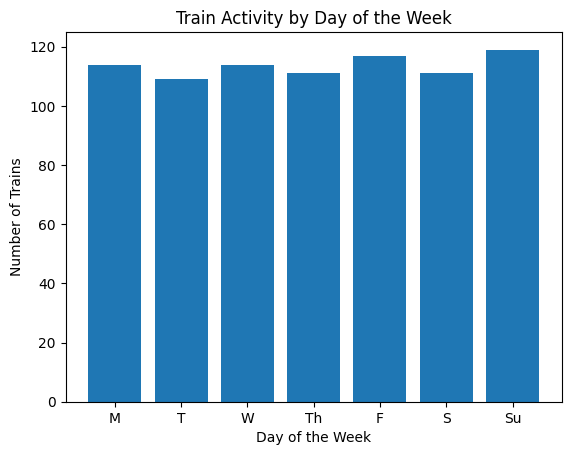

In [15]:
days = ['M', 'T', 'W', 'Th', 'F', 'S', 'Su']
counts = [schedule[day].sum() for day in days]

plt.figure()
plt.bar(days, counts)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trains')
_ = plt.title('Train Activity by Day of the Week')

Insights:-\
1) Almost equal number of trains halt everyday at the station (110 - 115)

Tracking the deployment frequency of trains (represented by the number of days they run per week)

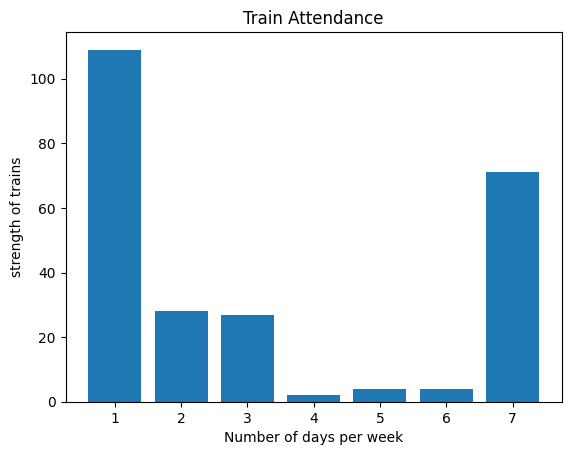

In [16]:
def cope(i):
  cnt = 0
  for day in days:
    cnt = cnt + schedule[day][i]

  return cnt

freq = [cope(i) for i in schedule.index]
hash_freq = [0, 0, 0, 0, 0, 0, 0]
for f in freq:
  hash_freq[f - 1] += 1

plt.figure()
plt.bar(['1', '2', '3', '4', '5', '6', '7'], hash_freq)
plt.xlabel('Number of days per week')
plt.ylabel('strength of trains')
_ = plt.title('Train Attendance')

Insights:-\
1) Most of the trains either run for half a week or less, or run for the entire week.\
2) Yet, the days allocated to the trains are in such a way that the number of trains per day is almost uniform.

The expanse and primeness of a station is determined by the stop times allocated to the trains. If they stop for more time, the station is one of the important ones in the network. We will do such an analysis for Secunderabad.

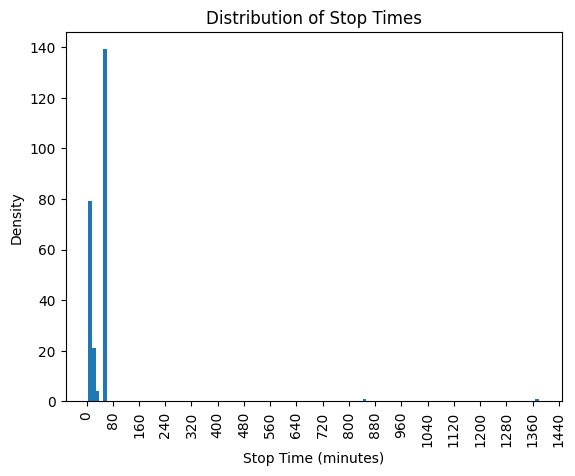

In [17]:
# Convert 'Stop time' to seconds for numerical representation
spans = schedule['Stop time'].dt.total_seconds() / 60

plt.hist(spans, bins = 120)
plt.xlabel('Stop Time (minutes)')
plt.ylabel('Density')
_ = plt.title('Distribution of Stop Times')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation = 90)
plt.show()

Insights:-\
1) Since many trains halt here, the stop times have been stretched towards 40 - 80 mins. Hence, Junction !!

In [18]:
li = []
for i in range(24):
  for j in range(0, 60, 5):
    li.append(dt.time(hour = i, minute = j))

li.sort()

Time series estimation of train density on particular days

In [65]:
train_counts = [] # against the time series 'Li'
tr_count = []
reliability_index = [] #supposed to be on a scale of 0 to 1 (a rough estimate of whether a train supposed to stop at this time will arrive on time and not be hindered by the traffic at the station)
r_index = []

for day in days:
  for time in li:
    count = 0
    for _, row in schedule.iterrows():
      arrives = row['Arrives']
      departs = row['Departs']
      if arrives != 'Starts' and departs != 'Ends':

        if arrives <= time < departs:

          if row[day] == 1:
            count += 1

    tr_count.append(count)

  if len(train_counts) == 0: maxC = max(tr_count)
  else: maxC = max(max(tr_count), maxC)

  train_counts.append(tr_count)
  tr_count = []


# prepare your reliablity index
for i in range(7):
  for j in range(len(train_counts[0])):
    r_index.append(1 - train_counts[i][j] / maxC)

  reliability_index.append(r_index)
  r_index = []

In [66]:
print(train_counts[0])
print(reliability_index[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

<Figure size 640x480 with 0 Axes>

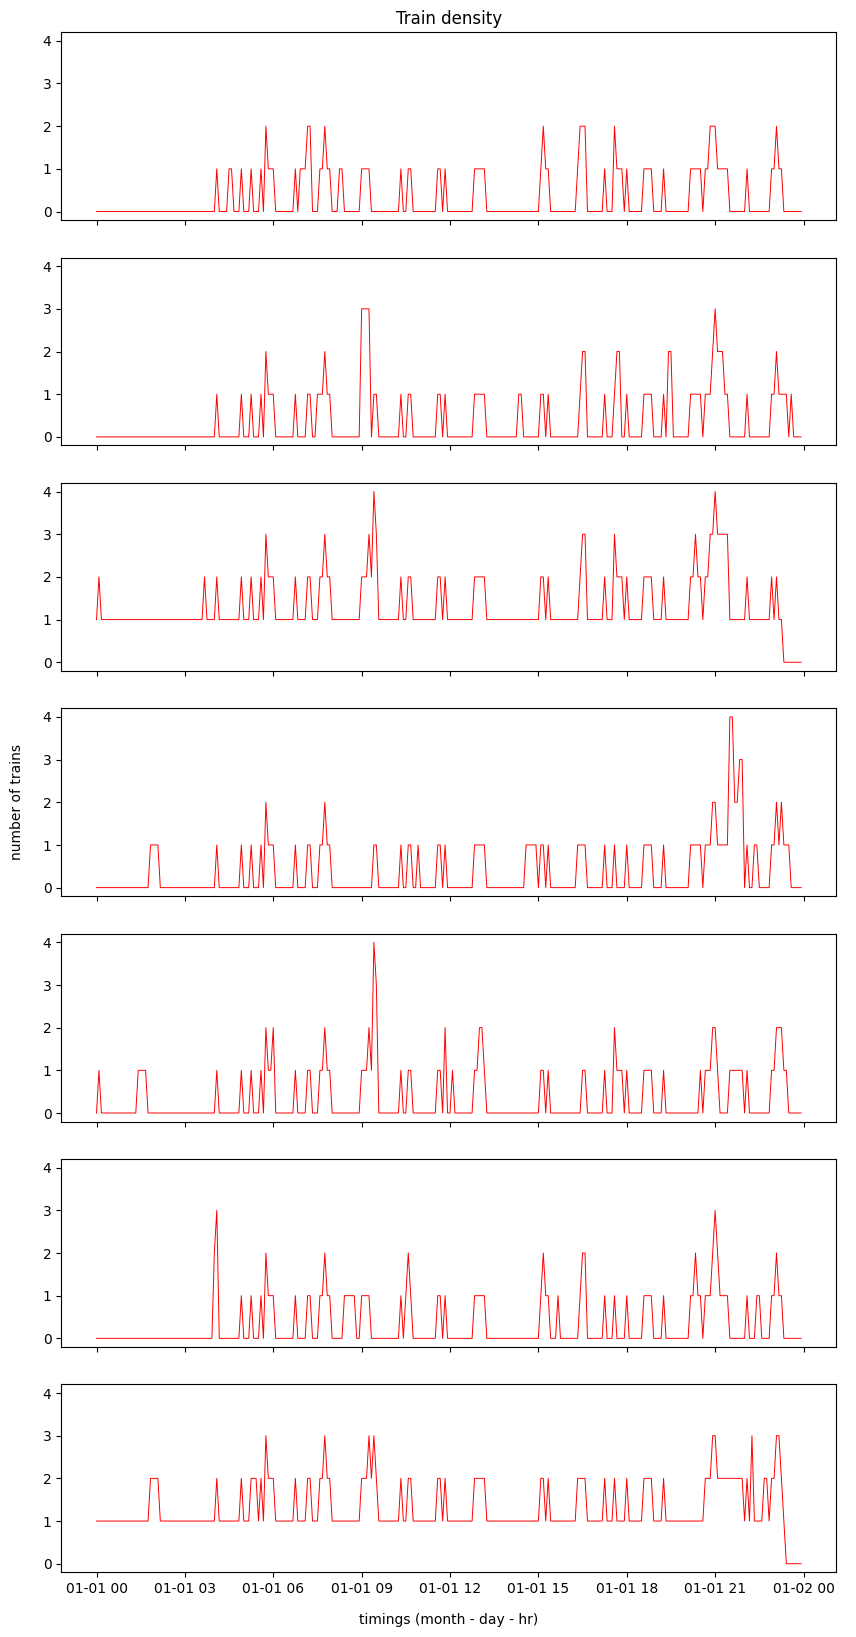

In [67]:
dummyDate = dt.date(year = 2024, month = 1, day = 1)
t_series = [datetime.combine(dummyDate, t) for t in li]

plt.figure()

fig, ax = plt.subplots(7, 1, sharex = True, sharey = True, figsize = (10, 20))

for i in range(7):
  plt.subplot(7, 1, i + 1)
  plt.plot_date(t_series, train_counts[i], fmt = 'r-', xdate = True, linewidth = '0.7')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('timings (month - day - hr)')
plt.ylabel('number of trains')
plt.xticks(rotation = 70)
plt.title('Train density')
plt.show()

<Figure size 640x480 with 0 Axes>

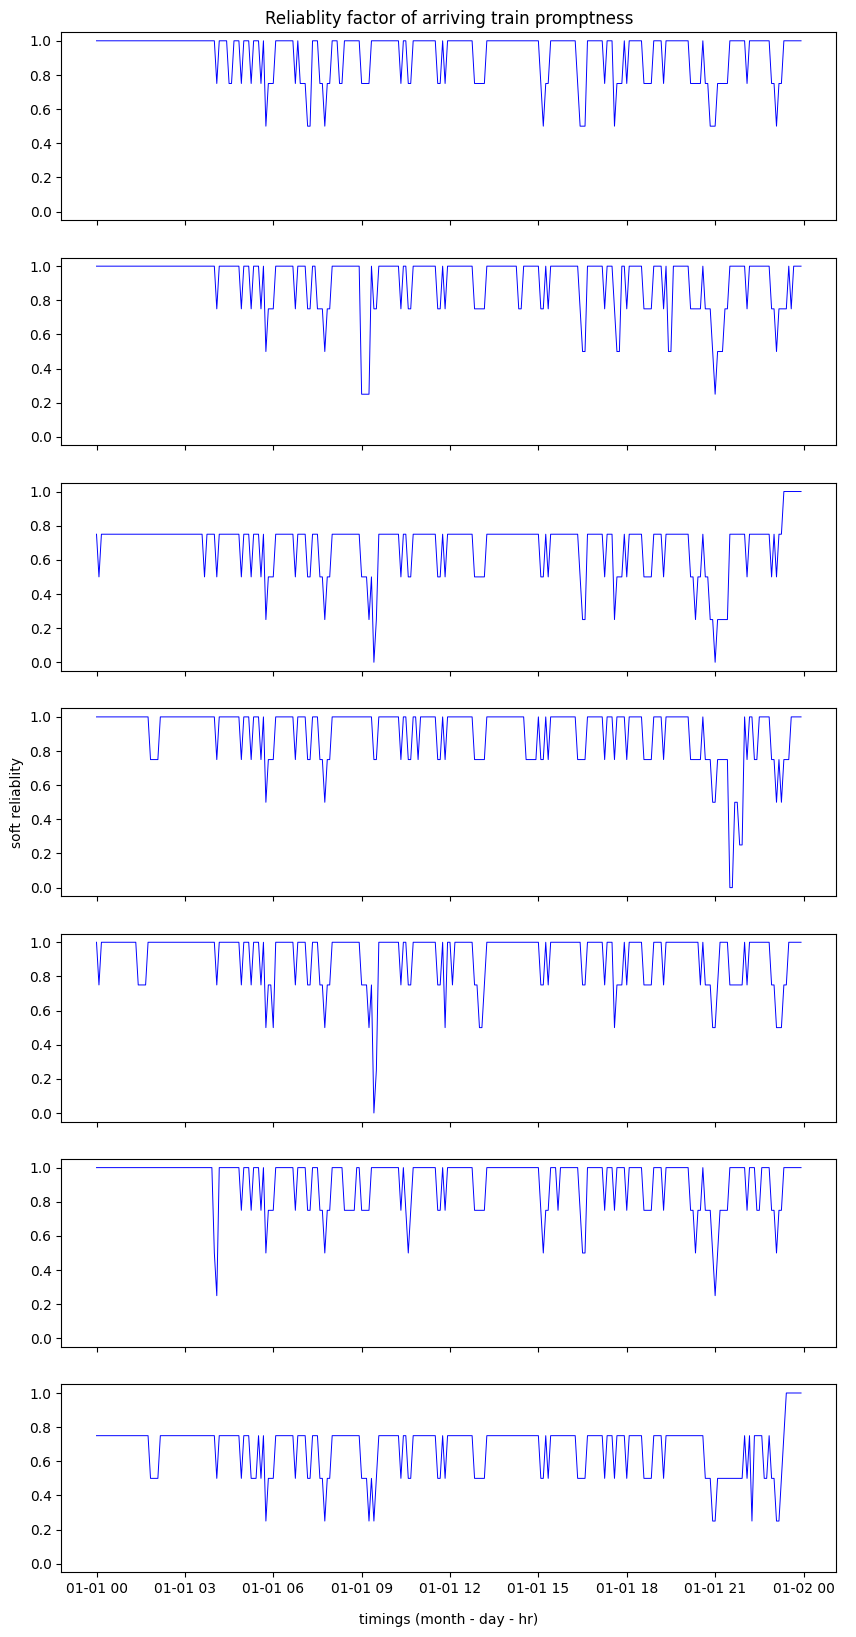

In [68]:
plt.figure()

fig, ax = plt.subplots(7, 1, sharex = True, sharey = True, figsize = (10, 20))

for i in range(7):
  plt.subplot(7, 1, i + 1)
  plt.plot_date(t_series, reliability_index[i], fmt = 'b-', xdate = True, linewidth = '0.7')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xticks(rotation = 70)
plt.xlabel('timings (month - day - hr)')
plt.ylabel('soft reliablity')
plt.title('Reliablity factor of arriving train promptness')

plt.show()

## File 2
---

In [24]:
avg_delay = pd.read_csv('avg_delay.csv')

In [25]:
avg_delay.head()

,Unnamed: 0,Train number,Delay in mins,ptr 0,ptr 1,ptr 2,ptr 3,ptr 4,ptr 5,ptr 6,...,ptr 65,ptr 66,ptr 67,ptr 68,ptr 69,ptr 70,ptr 71,ptr 72,ptr 73,ptr 74
0,0,11019,63,117,69,69.0,17.0,33.0,35.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11020,30,13,16,30.0,2.0,40.0,6.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12025,5,4,1,9.0,-5.0,12.0,-1.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,12026,5,7,0,3.0,13.0,16.0,1.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12213,22,30,26,11.0,23.0,48.0,21.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clearing unwanted cols, renaming cols, changing data types and filling null values

In [26]:
del avg_delay['Unnamed: 0']

In [27]:
avg_delay.rename(columns = {'Delay in mins' : 'Avg delay in mins'}, inplace = True)

In [28]:
avg_delay['Train number'] = avg_delay['Train number'].apply(lambda x : str(x))
mask = (avg_delay['Train number'].str.len() == 4)
avg_delay['Train number'][mask] = avg_delay['Train number'][mask].apply(lambda x : '0' + x)

print(avg_delay['Train number'])

0      11019
1      11020
2      12025
3      12026
4      12213
       ...  
163    22738
164    22849
165    22850
166    22881
167    22882
Name: Train number, Length: 168, dtype: object


<ipython-input-28-8b0d89fe3fc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay['Train number'][mask] = avg_delay['Train number'][mask].apply(lambda x : '0' + x)


In [29]:
avg_delay.fillna(0.0, inplace = True)

A pointer list as such is useful

In [30]:
ptrs = ['ptr ' + str(i) for i in range(75)]

for ptr in ptrs:
  avg_delay[ptr] = avg_delay[ptr].astype(np.int64)

In [31]:
avg_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Train number       168 non-null    object
 1   Avg delay in mins  168 non-null    int64 
 2   ptr 0              168 non-null    int64 
 3   ptr 1              168 non-null    int64 
 4   ptr 2              168 non-null    int64 
 5   ptr 3              168 non-null    int64 
 6   ptr 4              168 non-null    int64 
 7   ptr 5              168 non-null    int64 
 8   ptr 6              168 non-null    int64 
 9   ptr 7              168 non-null    int64 
 10  ptr 8              168 non-null    int64 
 11  ptr 9              168 non-null    int64 
 12  ptr 10             168 non-null    int64 
 13  ptr 11             168 non-null    int64 
 14  ptr 12             168 non-null    int64 
 15  ptr 13             168 non-null    int64 
 16  ptr 14             168 non-null    int64 
 1

In [32]:
avg_delay.head()

,Train number,Avg delay in mins,ptr 0,ptr 1,ptr 2,ptr 3,ptr 4,ptr 5,ptr 6,ptr 7,...,ptr 65,ptr 66,ptr 67,ptr 68,ptr 69,ptr 70,ptr 71,ptr 72,ptr 73,ptr 74
0,11019,63,117,69,69,17,33,35,21,21,...,0,0,0,0,0,0,0,0,0,0
1,11020,30,13,16,30,2,40,6,16,-30,...,0,0,0,0,0,0,0,0,0,0
2,12025,5,4,1,9,-5,12,-1,21,1,...,0,0,0,0,0,0,0,0,0,0
3,12026,5,7,0,3,13,16,1,37,29,...,0,0,0,0,0,0,0,0,0,0
4,12213,22,30,26,11,23,48,21,74,15,...,0,0,0,0,0,0,0,0,0,0


Doing a rough scatter plot

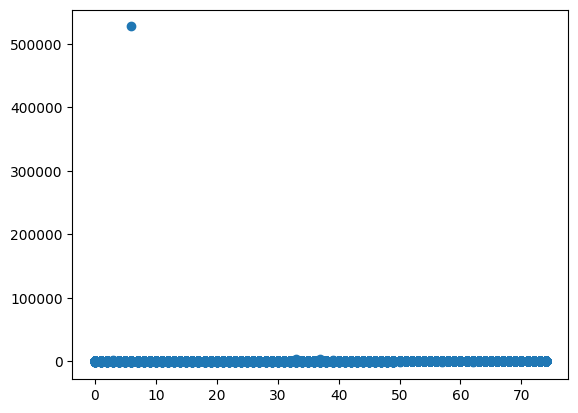

In [33]:
data = []
pos = []

for i in range(75):
  for j in avg_delay.index:
    data.append(avg_delay[ptrs[i]][j])
    pos.append(i)

plt.scatter(pos, data)
plt.show()

- An extreme outlier is visible. Removing that.

In [34]:
#remove the outlier
for i in range(10):
  mask = avg_delay[ptrs[i]] > 500000
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]

<ipython-input-34-38cedf06ccd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]
<ipython-input-34-38cedf06ccd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]
<ipython-input-34-38cedf06ccd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]
<ipython-input-34-38cedf06ccd4>:4:

Re-doing the scatter plot

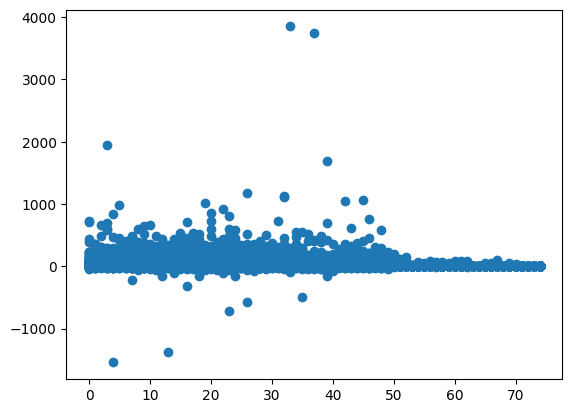

In [35]:
data = []
pos = []

for i in range(75):
  for j in avg_delay.index:
    data.append(avg_delay[ptrs[i]][j])
    pos.append(i)

plt.scatter(pos, data)
plt.show()

Removing further outliers. Specifically, train being late more than 1500 mins is visibly an outlier here. Also, Train being earlier than 200 mins is also an outlier. The threshold specifics of the outliers depend on the particular environment in which the data was recorded, here, it is the station wherein the strains halt.

In [36]:
for i in range(75):
  mask = avg_delay[ptrs[i]] >= 1500
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]

for i in range(75):
  mask = avg_delay[ptrs[i]] < -200
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]

<ipython-input-36-b32be5ce02de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]
<ipython-input-36-b32be5ce02de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]
<ipython-input-36-b32be5ce02de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay[ptrs[i]][mask] = avg_delay[ptrs[i-1]][mask]
<ipython-input-36-b32be5ce02de>:3:

Final scatter plot
---

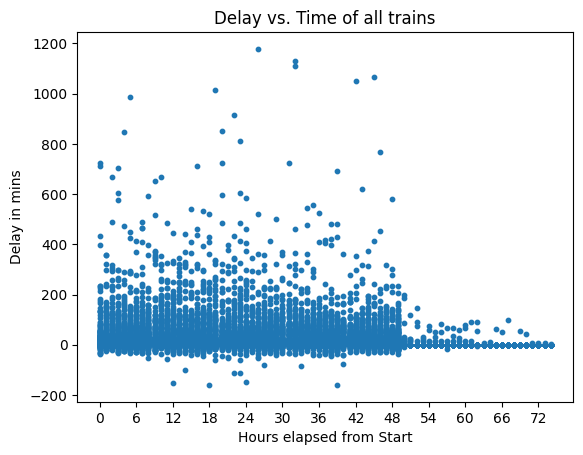

In [37]:
delay_data = []
hr_pos = []

for i in range(75):
  for j in avg_delay.index:
    delay_data.append(avg_delay[ptrs[i]][j])
    hr_pos.append(i)

plt.scatter(hr_pos, delay_data, s = 10)
plt.xlabel('Hours elapsed from Start')
plt.ylabel('Delay in mins')
plt.title('Delay vs. Time of all trains')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.show()

In [38]:
avg_delay.describe()

,Avg delay in mins,ptr 0,ptr 1,ptr 2,ptr 3,ptr 4,ptr 5,ptr 6,ptr 7,ptr 8,...,ptr 65,ptr 66,ptr 67,ptr 68,ptr 69,ptr 70,ptr 71,ptr 72,ptr 73,ptr 74
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,27.613095,41.880952,35.500000,46.005952,46.726190,40.357143,45.279762,39.113095,45.404762,41.976190,...,0.363095,0.291667,0.583333,0.0,0.321429,0.255952,0.029762,0.029762,0.029762,0.017857
std,45.055511,98.518475,66.254183,88.593501,98.586762,89.371276,103.013802,66.281149,86.141593,74.712459,...,4.706252,3.780432,7.560864,0.0,4.166190,3.317522,0.385758,0.385758,0.385758,0.231455
min,0.000000,-37.000000,-24.000000,-22.000000,-34.000000,-26.000000,-32.000000,-29.000000,-31.000000,-54.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.000000,0.000000,1.000000,0.750000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,13.000000,10.000000,9.000000,13.000000,11.000000,11.500000,15.000000,17.500000,16.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.250000,37.250000,38.500000,51.250000,50.000000,46.250000,52.250000,53.000000,56.250000,52.250000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,347.000000,725.000000,359.000000,668.000000,703.000000,847.000000,988.000000,414.000000,487.000000,591.000000,...,61.000000,49.000000,98.000000,0.0,54.000000,43.000000,5.000000,5.000000,5.000000,3.000000


Before reforming the averages as per the pointers, we will check if the reformation causes any significant deviation from the raw average that was obtained.

In [39]:
# dry check
rolling_avg = 0;
for i in range(75):
  rolling_avg += avg_delay[ptrs[i]][0]

rolling_avg /= 75
print(rolling_avg)

62.49333333333333


**We are good to go !!**

In [40]:
rolling_avg = 0

for i in avg_delay.index:
  for j in range(75):
    rolling_avg += avg_delay[ptrs[j]][i]

  rolling_avg //= 75
  avg_delay['Avg delay in mins'][i] = rolling_avg
  rolling_avg = 0

<ipython-input-40-0a17c701d78e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay['Avg delay in mins'][i] = rolling_avg
<ipython-input-40-0a17c701d78e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay['Avg delay in mins'][i] = rolling_avg
<ipython-input-40-0a17c701d78e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_delay['Avg delay in mins'][i] = rolling_avg
<ipython-input-40-0a17c701d78e>:8: SettingWithCopyWa

In [41]:
avg_delay.head()

,Train number,Avg delay in mins,ptr 0,ptr 1,ptr 2,ptr 3,ptr 4,ptr 5,ptr 6,ptr 7,...,ptr 65,ptr 66,ptr 67,ptr 68,ptr 69,ptr 70,ptr 71,ptr 72,ptr 73,ptr 74
0,11019,62,117,69,69,17,33,35,21,21,...,0,0,0,0,0,0,0,0,0,0
1,11020,23,13,16,30,2,40,6,16,-30,...,0,0,0,0,0,0,0,0,0,0
2,12025,4,4,1,9,-5,12,-1,21,1,...,0,0,0,0,0,0,0,0,0,0
3,12026,4,7,0,3,13,16,1,37,29,...,0,0,0,0,0,0,0,0,0,0
4,12213,22,30,26,11,23,48,21,74,15,...,0,0,0,0,0,0,0,0,0,0


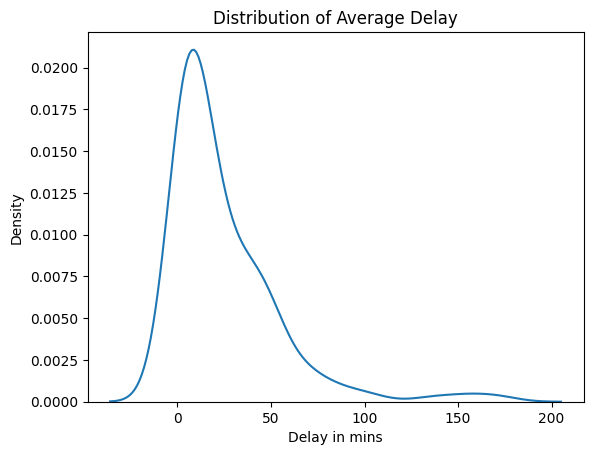

In [42]:
plt.figure()
sns.kdeplot(avg_delay['Avg delay in mins'].tolist())
plt.xlabel('Delay in mins')
plt.ylabel('Density')
_ = plt.title('Distribution of Average Delay')

We will be doing prediction in the future. For this, we combine the two df's

In [43]:
delay_run_stat = pd.merge(schedule, avg_delay, on = 'Train number')

In [44]:
delay_run_stat.head()

,Train number,Train name (no.) passing via Secunderabad Junction,Arrives,Departs,Stop time,M,T,W,Th,F,...,ptr 65,ptr 66,ptr 67,ptr 68,ptr 69,ptr 70,ptr 71,ptr 72,ptr 73,ptr 74
0,12733,Narayanadri Express (12733),06:25:00,Ends,0 days 00:59:00,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,12747,Palnadu Express (12747),10:35:00,10:45:00,0 days 00:10:00,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,12759,Charminar Express (12759),07:15:00,07:20:00,0 days 00:05:00,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,12734,Narayanadri Express (12734),Starts,18:05:00,0 days 00:59:00,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,12760,Charminar Express (12760),18:50:00,18:55:00,0 days 00:05:00,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
len(delay_run_stat)

120

In [71]:
time_reliability = [(li[i], reliability_index[0][i], reliability_index[1][i], reliability_index[2][i], reliability_index[3][i], reliability_index[4][i], reliability_index[5][i], reliability_index[6][i]) for i in range(len(li))]

reliable_note = pd.DataFrame(time_reliability, columns = ['Time'] + ['Soft reliability - '+day for day in days])

In [72]:
reliable_note

,Time,Soft reliability - M,Soft reliability - T,Soft reliability - W,Soft reliability - Th,Soft reliability - F,Soft reliability - S,Soft reliability - Su
0,00:00:00,1.0,1.00,0.75,1.0,1.00,1.0,0.75
1,00:05:00,1.0,1.00,0.50,1.0,0.75,1.0,0.75
2,00:10:00,1.0,1.00,0.75,1.0,1.00,1.0,0.75
3,00:15:00,1.0,1.00,0.75,1.0,1.00,1.0,0.75
4,00:20:00,1.0,1.00,0.75,1.0,1.00,1.0,0.75
...,...,...,...,...,...,...,...,...
283,23:35:00,1.0,0.75,1.00,1.0,1.00,1.0,1.00
284,23:40:00,1.0,1.00,1.00,1.0,1.00,1.0,1.00
285,23:45:00,1.0,1.00,1.00,1.0,1.00,1.0,1.00
286,23:50:00,1.0,1.00,1.00,1.0,1.00,1.0,1.00


Saving the files

In [73]:
delay_run_stat.to_csv('delay_run_stat.csv')
reliable_note.to_csv('reliable_note.csv')